# Linear Regression

![](img/linear_regression.png "Text to show on mouseover")

In [10]:
# Importing

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Plotting parameters

plt.style.use('science')
plt.rcParams['figure.figsize'] = (7,5)
plt.rcParams['font.size'] = 15
plt.rcParams['text.usetex'] = True

Our data will be of the form $y(x) = \theta_0 + \theta_1 x$ with some random noise. The objective of a linear model is to find the optimum $\hat{\theta}$ such that the MSE is minimum.

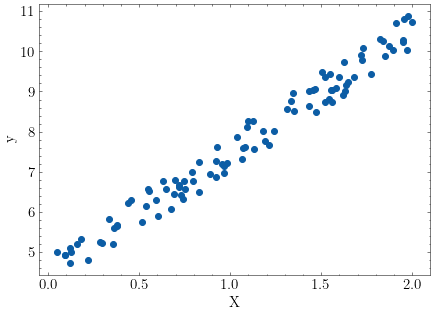

In [11]:
# Generating data

X = 2* np.random.rand(100, 1)
y = 4 + 3*X + np.random.rand(100, 1)

plt.scatter(X, y)
plt.xlabel("X")
plt.ylabel("y")
plt.show()

## Normal Equation (Exact solution)

In [12]:
# Normal equation

class NormalLinearRegression:
    def __init__(self):
        pass
    
    def fit(self, X, y):
        X_b = np.c_[(np.ones((X.shape[0], X.shape[1])), X)]
        self.theta_ = np.linalg.inv(X_b.T@X_b)@X_b.T@y
    
    def predict(self, X):
        X_b = np.c_[(np.ones((X.shape[0], X.shape[1])), X)]
        return X_b @ self.theta_

In [13]:
lin_reg = NormalLinearRegression()
lin_reg.fit(X, y)

In [14]:
# Our parameters estimations is pretty close from the original (4,3) parameters

print(lin_reg.theta_)

[[4.51479933]
 [2.98588258]]


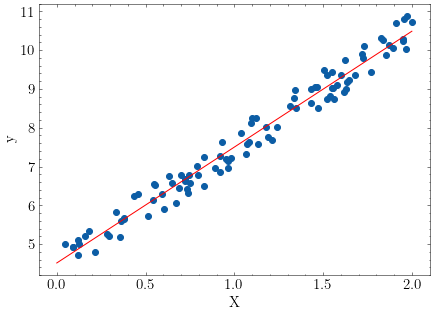

In [15]:
# Lets predict two points at the extremes to make a line plot

X_new = np.array([[0],
                  [2]])

y_pred = lin_reg.predict(X_new)

# Plot

plt.scatter(X, y, label='Data')
plt.plot(X_new, y_pred, c='r', label='Fit')
plt.xlabel("X")
plt.ylabel("y")
plt.show()

This method doesn't work if $X^T X$ is singular. In practice, sklearn uses SVD to compute a pseudo inverse which is faster and more reliable.

In [16]:
# Comparing sklearn with our implementation

sk_lin_reg = LinearRegression()
sk_lin_reg.fit(X, y)

y_sk = sk_lin_reg.predict(X)
y_frank = lin_reg.predict(X)

In [28]:
print('Sklearn')
print(f'MSE: {mean_squared_error(y, y_sk):.2f}')
print(f'R2: {r2_score(y, y_sk):.2f}')

Sklearn
RMSE: 0.08
R2: 0.97


In [30]:
print('Frank')
print(f'MSE: {mean_squared_error(y, y_frank):.2f}')
print(f'R2: {r2_score(y, y_frank):.2f}')

Frank
RMSE: 0.08
R2: 0.97


## Stochastic Gradient Descent

The stochastic gradient descent consists in initialize our parameters randomly and move towards a minimum MSE by removing the gradient of the cost function at the actual point.

In [55]:
# Gradient Descent

class SGDLinearRegression:
    def __init__(self, eta=1.0):
        self.eta = eta
        
    def fit(self, X, y):
        m_ = X.shape[0]
        n_ = X.shape[1]
        X_b_ = np.c_[np.ones(m_), X]
        
        self.theta_ = np.random.rand(n_ + 1)
        
        for i in range(50):
            grad = (2/m_) * X_b_.T @ (X_b_ @ self.theta_ - y) 
            self.theta_ = self.theta_ - self.eta*(grad)
        
        return self
    
    def predict(self, X):
        pass

In [56]:
sgd_frank = SGDLinearRegression()
sgd_frank.fit(X, y)

ValueError: operands could not be broadcast together with shapes (2,) (2,100) 

In [37]:
from sklearn.linear_model import 

SyntaxError: invalid syntax (<ipython-input-37-e4c7f36eaccf>, line 1)